Importing the dataset and Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sb
df = pd.read_excel(r"C:\Users\Dell\Downloads\BlinkIT Grocery Data.xlsx")

In [4]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,Regular,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


Data Cleaning

In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7060 entries, 0 to 8245
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           7060 non-null   object 
 1   Item Identifier            7060 non-null   object 
 2   Item Type                  7060 non-null   object 
 3   Outlet Establishment Year  7060 non-null   int64  
 4   Outlet Identifier          7060 non-null   object 
 5   Outlet Location Type       7060 non-null   object 
 6   Outlet Size                7060 non-null   object 
 7   Outlet Type                7060 non-null   object 
 8   Item Visibility            7060 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      7060 non-null   float64
 11  Rating                     7060 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 717.0+ KB


In [23]:
df["Sales"]=df["Sales"].astype(int)

In [8]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                          int64
Rating                       float64
dtype: object

In [9]:
pd.isnull(df).sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

In [10]:
df.shape

(7060, 12)

In [12]:
df["Item Fat Content"].value_counts()

Item Fat Content
Low Fat    4482
Regular    2494
low fat      84
Name: count, dtype: int64

In [108]:
df["Item Fat Content"] = (df["Item Fat Content"].str.strip().str.lower())

In [109]:
df["Item Fat Content"]=df["Item Fat Content"].replace({'low fat':'Low Fat','regular':'Regular'})

In [110]:
df["Item Fat Content"].value_counts()

Item Fat Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Analysis Based on Item Fat content

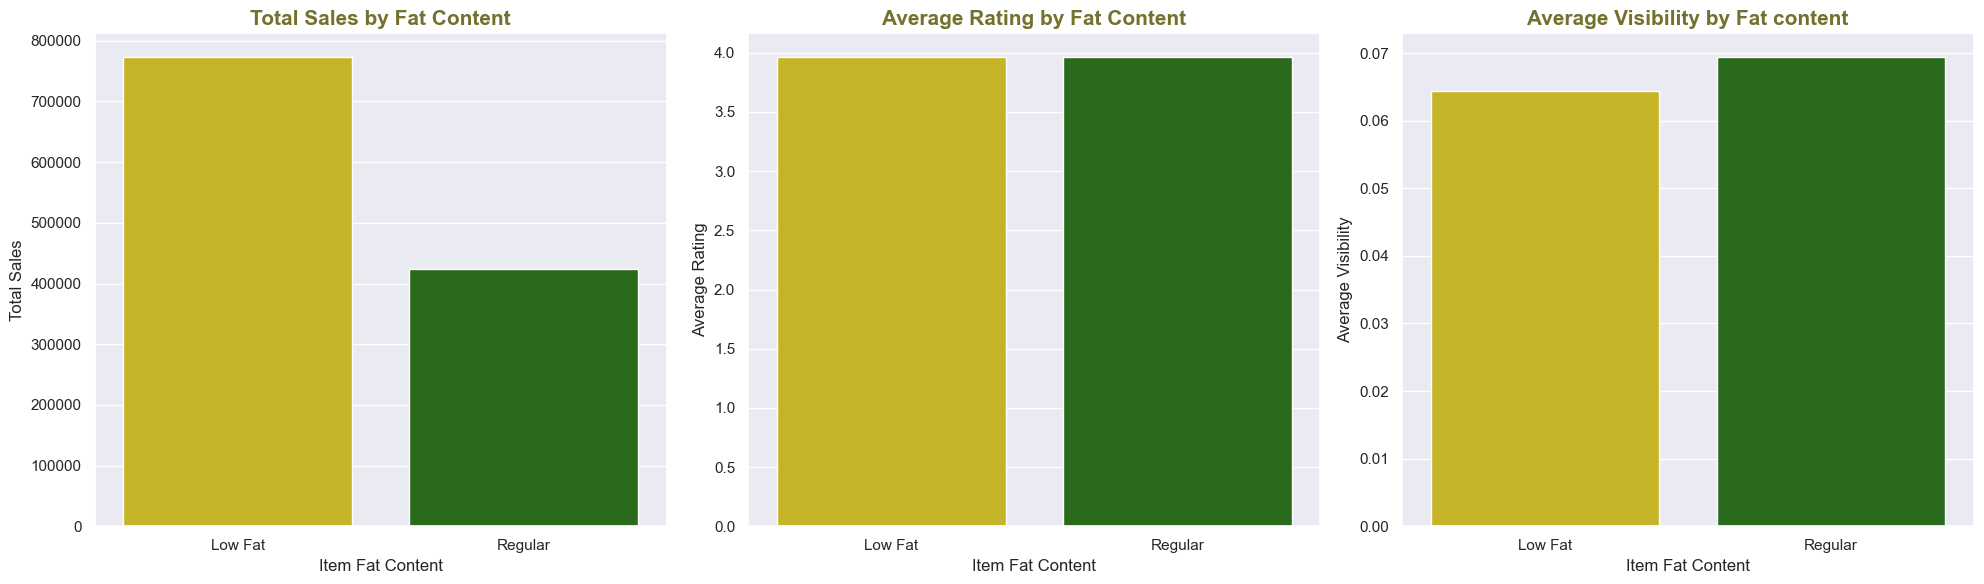

In [125]:
sales_fat = df.groupby(['Item Fat Content'], as_index=False)['Sales'].sum()
rating_fat = df.groupby(['Item Fat Content'], as_index=False)['Rating'].mean()
visibility_fat = df.groupby(['Item Fat Content'], as_index=False)['Item Visibility'].mean()

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True)

sb.barplot(data=sales_fat, x='Item Fat Content', y='Sales', hue='Item Fat Content',ax=axes[0],palette=["#e1c90d","#22770f"])
axes[0].set_title('Total Sales by Fat Content',color="#73712d",fontweight="semibold",fontsize=15) 
axes[0].set_ylabel('Total Sales')

sb.barplot(data=rating_fat, x='Item Fat Content', y='Rating', hue='Item Fat Content', ax=axes[1],palette=["#e1c90d","#22770f"])
axes[1].set_title('Average Rating by Fat Content',color="#73712d",fontweight="semibold",fontsize=15)
axes[1].set_ylabel('Average Rating')

sb.barplot(data=visibility_fat, x='Item Fat Content', y='Item Visibility', hue='Item Fat Content', ax=axes[2],palette=["#e1c90d","#22770f"])
axes[2].set_title('Average Visibility by Fat content',color="#73712d",fontweight="semibold",fontsize=15)
axes[2].set_ylabel('Average Visibility')

plt.tight_layout()
plt.show()

Analysis Based on Item Type

In [132]:
#Sales

In [128]:
item_sales = df.groupby(["Item Type"],as_index=False)["Sales"].sum().sort_values(by="Sales",ascending=False).head(10)

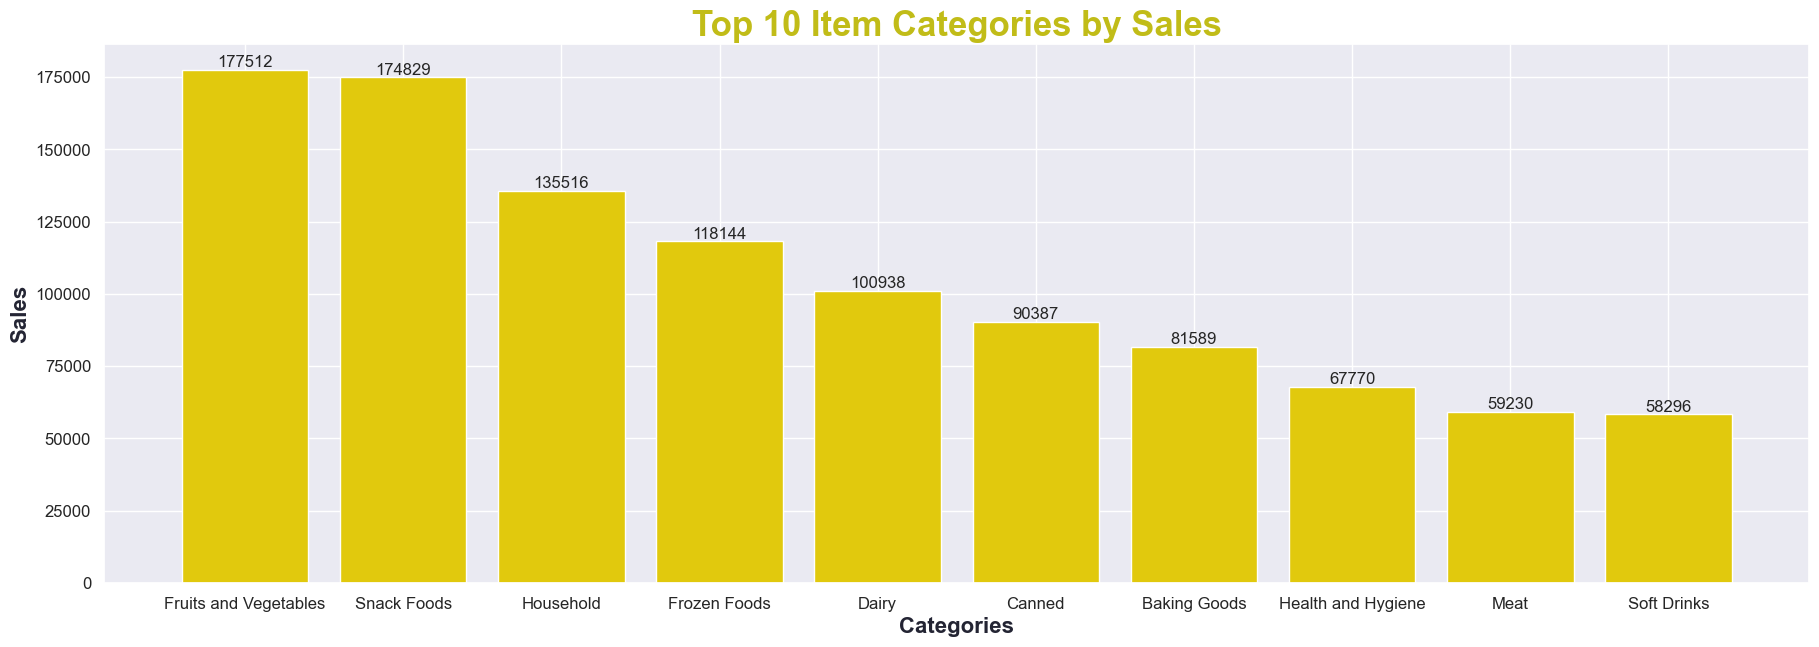

In [130]:
plt.figure(figsize=(22,7))
bar4 = plt.bar(item_sales["Item Type"],item_sales["Sales"],color="#e1c90d")
plt.title("Top 10 Item Categories by Sales",fontsize=25,family="Arial",fontweight="bold",color="#c1bc18")
plt.xlabel("Categories",fontsize=16,family="Arial",fontweight="semibold",color="#232433")
plt.ylabel("Sales",fontsize=16,family="Arial",fontweight="semibold",color="#232433")
plt.bar_label(bar4)
plt.tick_params(axis="both",labelsize=12)
plt.show()

In [101]:
#Visibility

In [120]:
category_perf = (df.groupby("Item Type", as_index=False).agg({"Sales": "sum","Item Visibility": "mean"}))

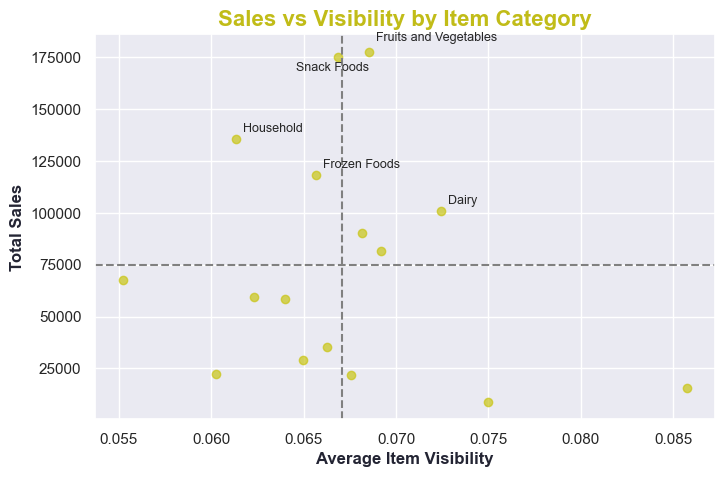

In [121]:
plt.figure(figsize=(8, 5))
plt.scatter(category_perf["Item Visibility"],category_perf["Sales"],alpha=0.7,color="#c9c515")
top_sales = category_perf.nlargest(5, "Sales")
offsets = {
    "Fruits and Vegetables": (5, 8),
    "Snack Foods": (-30, -10)
}

for _, row in top_sales.iterrows():
    dx, dy = offsets.get(row["Item Type"], (5, 5))
    plt.annotate(
        row["Item Type"],
        (row["Item Visibility"], row["Sales"]),
        xytext=(dx, dy),
        textcoords="offset points",
        fontsize=9
    )
plt.axhline(category_perf["Sales"].mean(), linestyle="--",color="gray")
plt.axvline(category_perf["Item Visibility"].mean(), linestyle="--",color="gray")
plt.xlabel("Average Item Visibility",family="Arial",fontweight="semibold",color="#232433")
plt.ylabel("Total Sales",family="Arial",fontweight="semibold",color="#232433")
plt.title("Sales vs Visibility by Item Category",color="#c1bc18",fontsize=16,family="Arial",fontweight="bold")
plt.show()

In [176]:
#Ratings

In [18]:
item_rate2 = df.groupby(["Item Type"],as_index=False)["Rating"].mean().sort_values(by="Rating",ascending=False)

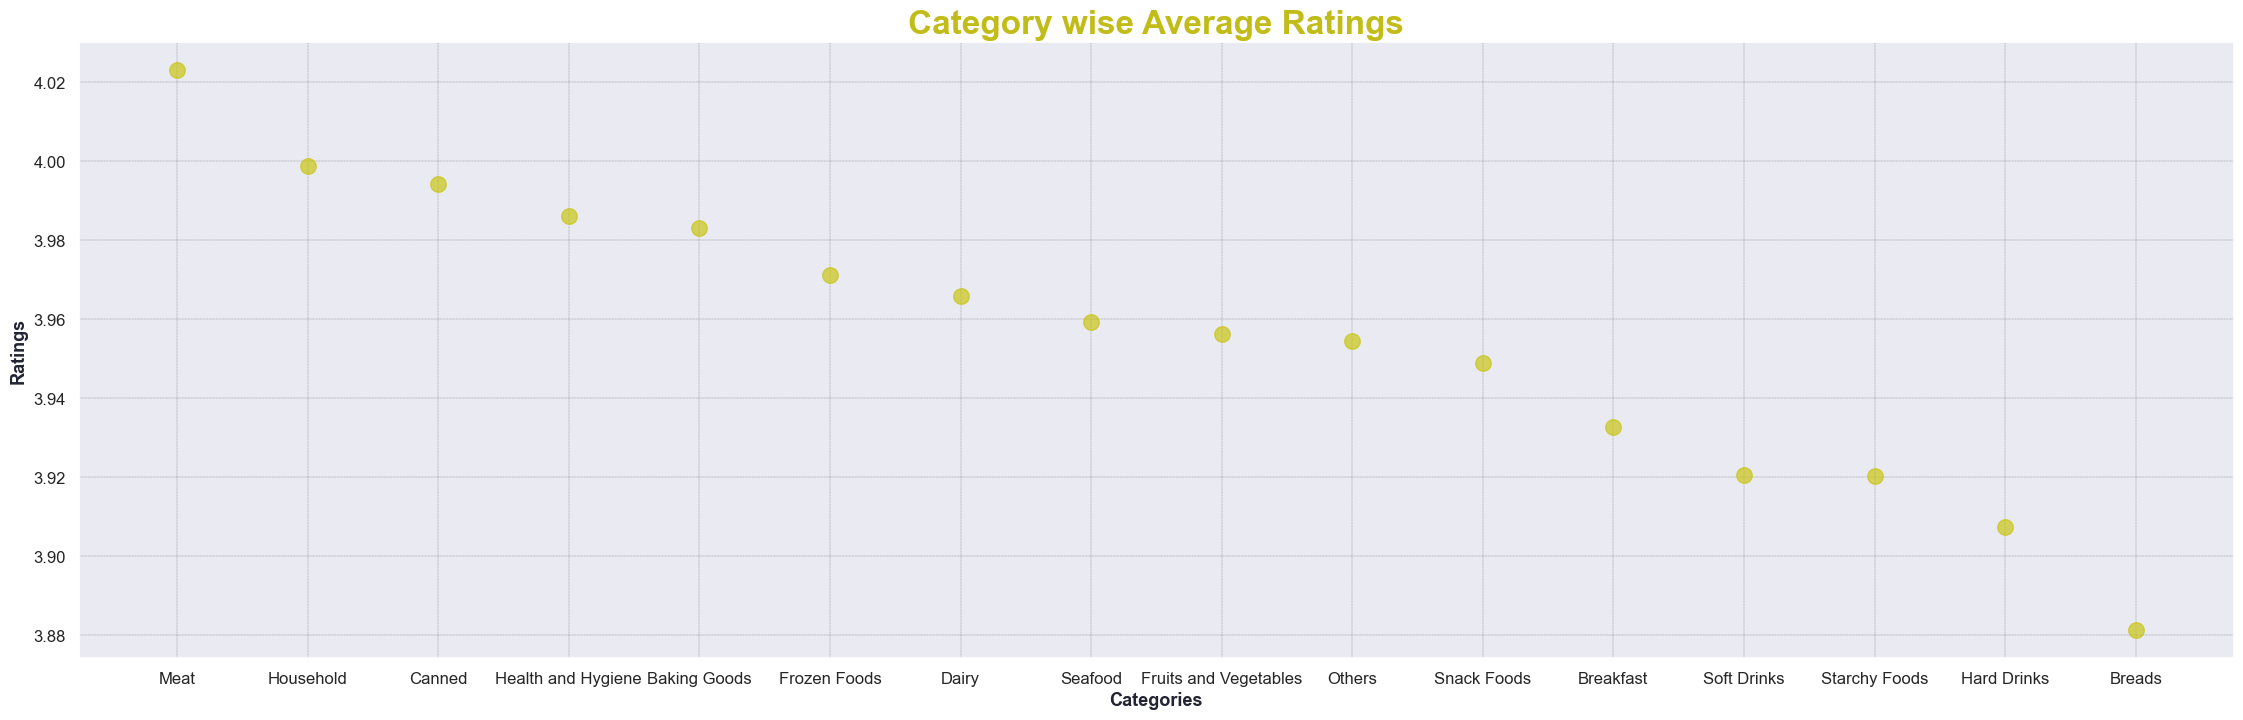

In [90]:
plt.figure(figsize=(27.8,8))
plt.scatter(item_rate2["Item Type"],item_rate2["Rating"],alpha=0.7,s=125,color="#c9c515")
plt.title("Category wise Average Ratings",color="#c1bc18",fontsize=24,family="Arial",fontweight="semibold")
plt.xlabel("Categories",color="#232433",fontsize=13,family="Arial",fontweight="semibold")
plt.ylabel("Ratings",color="#232433",fontsize=13,family="Arial",fontweight="semibold")
plt.grid(axis="both",color="#444347",linewidth=0.2,linestyle="dashed")
plt.tick_params(axis="both",labelsize=12)
plt.show()

Analysis Based On Outlets

In [54]:
#Subplots to compare Location Type on different Metrics

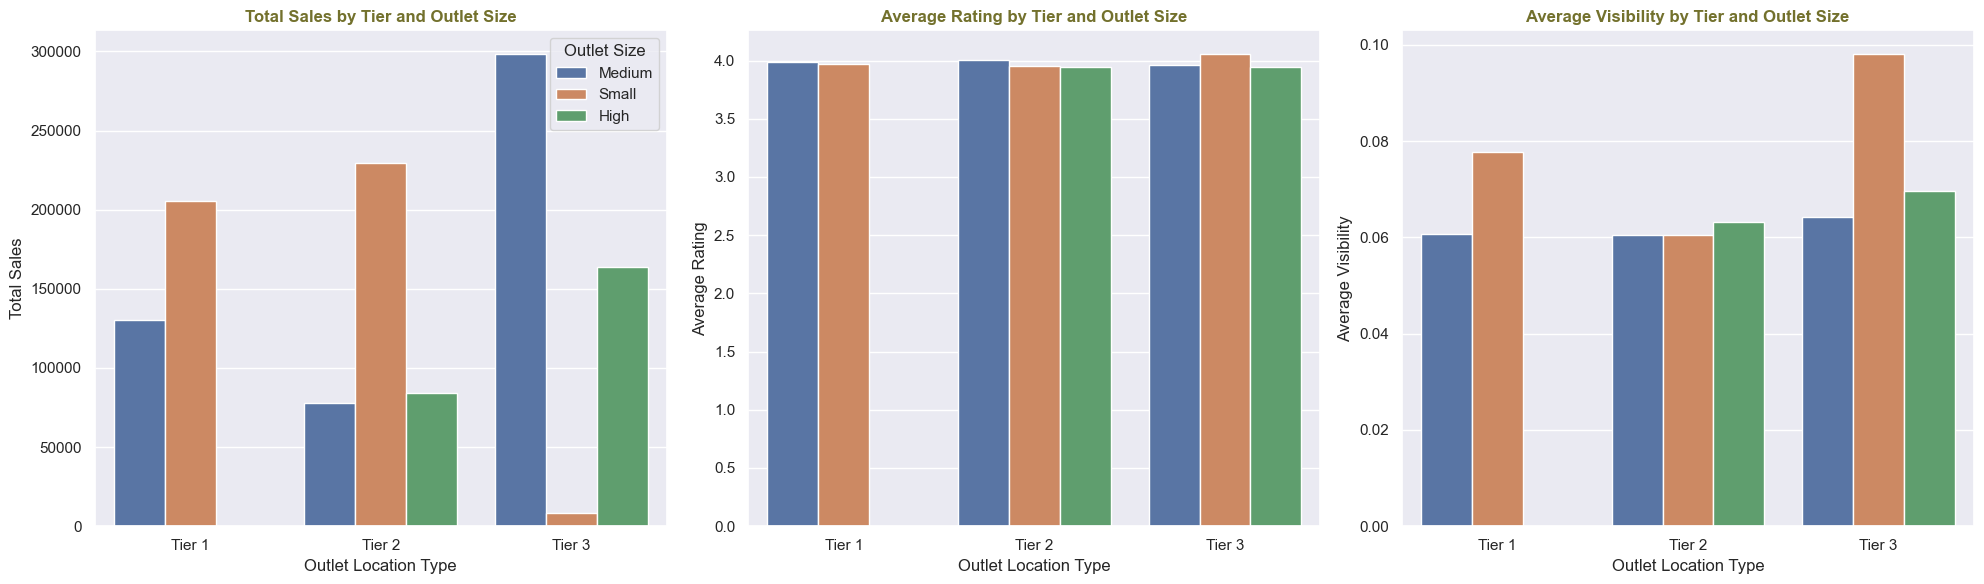

In [99]:
sales_df = df.groupby(['Outlet Location Type','Outlet Size'], as_index=False)['Sales'].sum()
rating_df = df.groupby(['Outlet Location Type','Outlet Size'], as_index=False)['Rating'].mean()
visibility_df = df.groupby(['Outlet Location Type','Outlet Size'], as_index=False)['Item Visibility'].mean()

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True)

sb.barplot(data=sales_df, x='Outlet Location Type', y='Sales', hue='Outlet Size', ax=axes[0])
axes[0].set_title('Total Sales by Tier and Outlet Size',color="#73712d",fontweight="semibold") 
axes[0].set_ylabel('Total Sales')

sb.barplot(data=rating_df, x='Outlet Location Type', y='Rating', hue='Outlet Size', ax=axes[1])
axes[1].set_title('Average Rating by Tier and Outlet Size',color="#73712d",fontweight="semibold")
axes[1].set_ylabel('Average Rating'); axes[1].legend_.remove()

sb.barplot(data=visibility_df, x='Outlet Location Type', y='Item Visibility', hue='Outlet Size', ax=axes[2])
axes[2].set_title('Average Visibility by Tier and Outlet Size',color="#73712d",fontweight="semibold")
axes[2].set_ylabel('Average Visibility'); axes[2].legend_.remove()

plt.tight_layout()
plt.show()

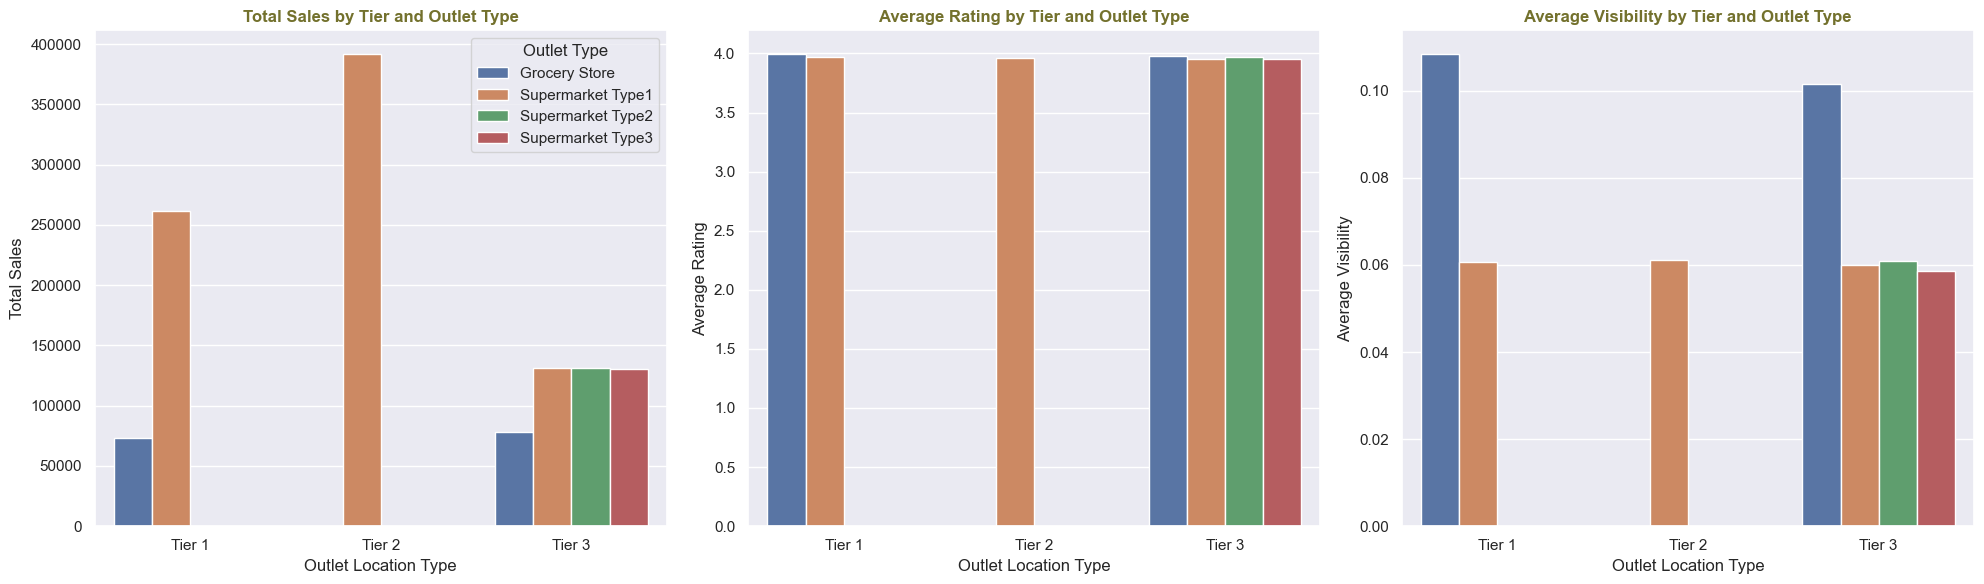

In [98]:
sales_df_ty = df.groupby(['Outlet Location Type','Outlet Type'], as_index=False)['Sales'].sum()
rating_df_ty = df.groupby(['Outlet Location Type','Outlet Type'], as_index=False)['Rating'].mean()
visibility_df_ty = df.groupby(['Outlet Location Type','Outlet Type'], as_index=False)['Item Visibility'].mean()

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True)

sb.barplot(data=sales_df_ty, x='Outlet Location Type', y='Sales', hue='Outlet Type', ax=axes[0])
axes[0].set_title('Total Sales by Tier and Outlet Type',color="#73712d",fontweight="semibold") 
axes[0].set_ylabel('Total Sales')

sb.barplot(data=rating_df_ty, x='Outlet Location Type', y='Rating', hue='Outlet Type', ax=axes[1])
axes[1].set_title('Average Rating by Tier and Outlet Type',color="#73712d",fontweight="semibold")
axes[1].set_ylabel('Average Rating'); axes[1].legend_.remove()

sb.barplot(data=visibility_df_ty, x='Outlet Location Type', y='Item Visibility', hue='Outlet Type', ax=axes[2])
axes[2].set_title('Average Visibility by Tier and Outlet Type',color="#73712d",fontweight="semibold")
axes[2].set_ylabel('Average Visibility'); axes[2].legend_.remove()

plt.tight_layout()
plt.show()

In [134]:
#Based on Different Tiers

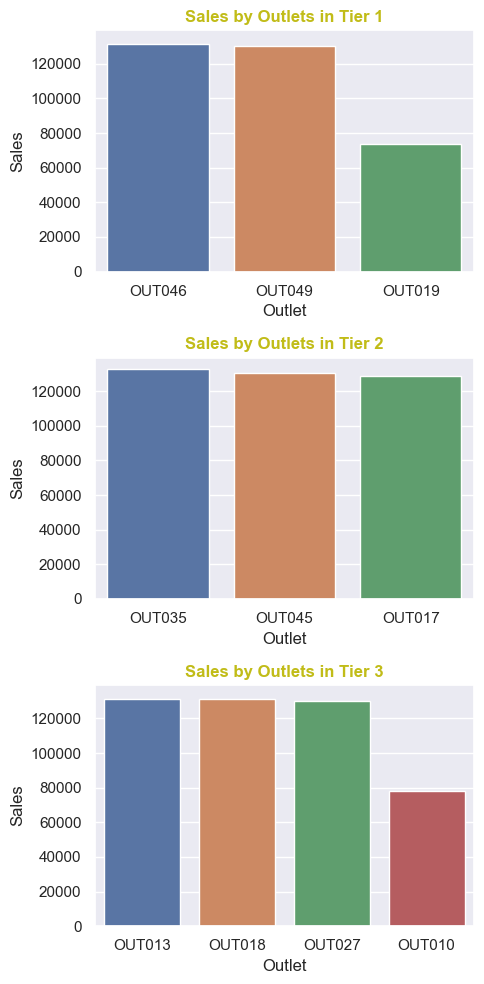

In [94]:
tier_sales = (df.groupby(['Outlet Location Type','Outlet Identifier'], as_index=False)['Sales'].sum().sort_values('Sales', ascending=False))

fig, axes = plt.subplots(3, 1, figsize=(5, 10), sharey=True)

sb.barplot(data=tier_sales[tier_sales['Outlet Location Type']=='Tier 1'],
            y='Sales', x='Outlet Identifier', ax=axes[0],hue="Outlet Identifier")
axes[0].set_title('Sales by Outlets in Tier 1',color="#c1bc18",fontweight="semibold"); axes[0].set_xlabel('Outlet')

sb.barplot(data=tier_sales[tier_sales['Outlet Location Type']=='Tier 2'],
            y='Sales', x='Outlet Identifier', ax=axes[1],hue="Outlet Identifier")
axes[1].set_title('Sales by Outlets in Tier 2',color="#c1bc18",fontweight="semibold"); axes[1].set_xlabel('Outlet')

sb.barplot(data=tier_sales[tier_sales['Outlet Location Type']=='Tier 3'],
            y='Sales', x='Outlet Identifier', ax=axes[2],hue="Outlet Identifier")
axes[2].set_title('Sales by Outlets in Tier 3',color="#c1bc18",fontweight="semibold"); axes[2].set_xlabel('Outlet')

plt.tight_layout()
plt.show()

In [81]:
#Outlet Establishment Year

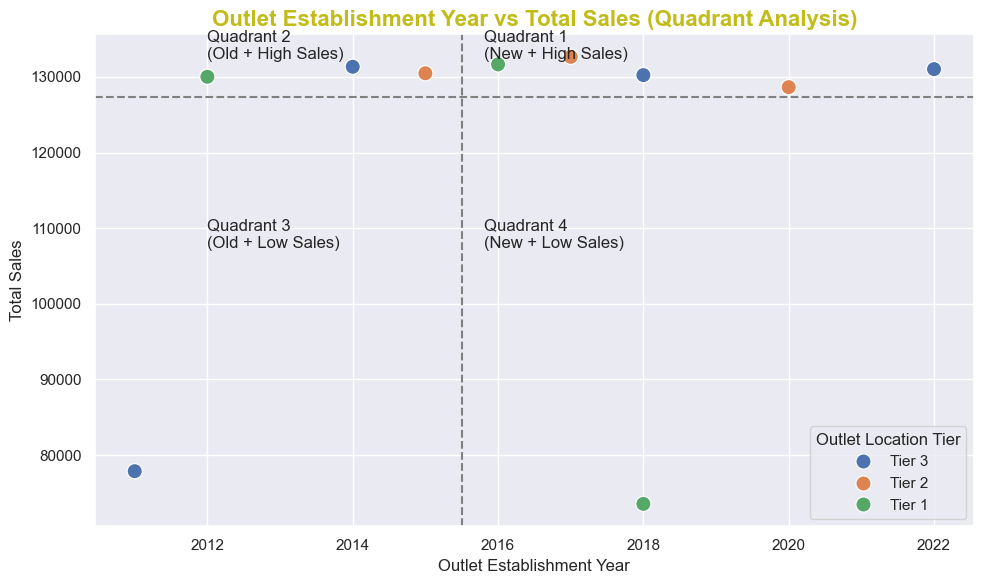

In [97]:
outlet_sales_qd = df.groupby(['Outlet Identifier', 'Outlet Establishment Year', 'Outlet Location Type'],as_index=False)['Sales'].sum()
x_median = outlet_sales_qd['Outlet Establishment Year'].median()
y_median = outlet_sales_qd['Sales'].median()

x_ref = x_median - 1      
y_ref = y_median - 3000

plt.figure(figsize=(10, 6))

sb.scatterplot(data=outlet_sales_qd,x='Outlet Establishment Year',y='Sales',hue='Outlet Location Type',s=120)
plt.axvline(x=x_ref, linestyle='--',color="gray")
plt.axhline(y=y_ref, linestyle='--',color="gray")

plt.text(x_ref + 0.3, y_ref + 5000, 'Quadrant 1\n(New + High Sales)')
plt.text(x_ref - 3.5, y_ref + 5000, 'Quadrant 2\n(Old + High Sales)')
plt.text(x_ref - 3.5, y_ref - 20000, 'Quadrant 3\n(Old + Low Sales)')
plt.text(x_ref + 0.3, y_ref - 20000, 'Quadrant 4\n(New + Low Sales)')
plt.title('Outlet Establishment Year vs Total Sales (Quadrant Analysis)',color="#c1bc18",fontweight="semibold",fontsize=16)
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.legend(title='Outlet Location Tier')
plt.tight_layout()
plt.show()